# Figure 1b. Number of detectable and mappable xQTL loci in single−context fine−mapping
The x axis represents the number of detectable or mappable xQTL loci, the y axis represents the context

## detectable xQTL loci in single-context fine-mapping

In [ ]:
library(dplyr)
library(stringr)
library(data.table)
library(ggplot2)

In [3]:
single_context_detectable_events_summary <- readRDS("/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_1b_ii_1.rds") #FIXME
### define category color"
color_palette <- c("1" = "#3578A3", "2" = "#4B8F78", "3" = "#EA5E2C", "4" = "#CDBA2E", "5" = "#E69933", "6" = "#592357")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
#head(top_loci_meta_file)

In [3]:
#color_palette <- brewer.pal(6, "Set2")

# First: calculate total counts per resource
total_counts <-  single_context_detectable_events_summary%>%
  group_by(resource) %>%
  summarise(total_log_count = sum(log_gene_count), .groups = "drop")

# Identify metabrain contexts
metabrain_contexts <- grep("Metabrain", total_counts$resource, value = TRUE)

# Reorder factor levels: non-metabrain (descending), then metabrain (descending)
non_meta <- total_counts %>%
  filter(!resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

meta <- total_counts %>%
  filter(resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

ordered_resources <- factor(c(non_meta, meta), levels = c(non_meta, meta))

# Apply the order to your main data
single_context_detectable_events_summary$resource <- factor(single_context_detectable_events_summary$resource, levels = rev(levels(ordered_resources)))

#pdf("single_context_stacked_plot_detectable.pdf", width =10, height = 10)
# Create stacked bar plot
p1 <- ggplot(single_context_detectable_events_summary, aes(x = resource, y = log_gene_count, fill = n_detectable_category)) +
  geom_bar(stat = "identity", position = "stack") +  # Stacked bars
  geom_text(aes(label = gene_count), position = position_stack(vjust = 0.5), color = "black", size = 4, fontface = "bold") +
  scale_fill_manual(values = color_palette, 
                    name = "Detectable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95),"1~3", "4~6", "7~9", "10~12","13~15")),guide = guide_legend(reverse = TRUE)) + 
  labs(title = "Number of detectable xQTL loci in single-context fine-mapping",
       x = "xQTL",
       y = "Number of detectable xQTL loci") +
  coord_flip() +
  theme_minimal() +
  theme(plot.title  = element_text(size = 20, face = "bold", hjust = 0.5),
       # aspect.ratio = 1/3,
    plot.title.position = "plot",
    axis.text.x = element_blank(),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 15, face = "bold"),
    legend.position = c(0.8, 0.45),
    #plot.margin = margin(10, 10, 10, 80),
    panel.grid   = element_blank(),        # removes both x and y grid lines
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background  = element_rect(fill = "white", colour = NA),
    axis.line = element_line(color = "black", size = 0.6),
      legend.key.size = unit(1.5, "lines"),
      legend.key.height = unit(1.5, "lines"),
  legend.key.width  = unit(1.5, "lines")
)
#dev.off()

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


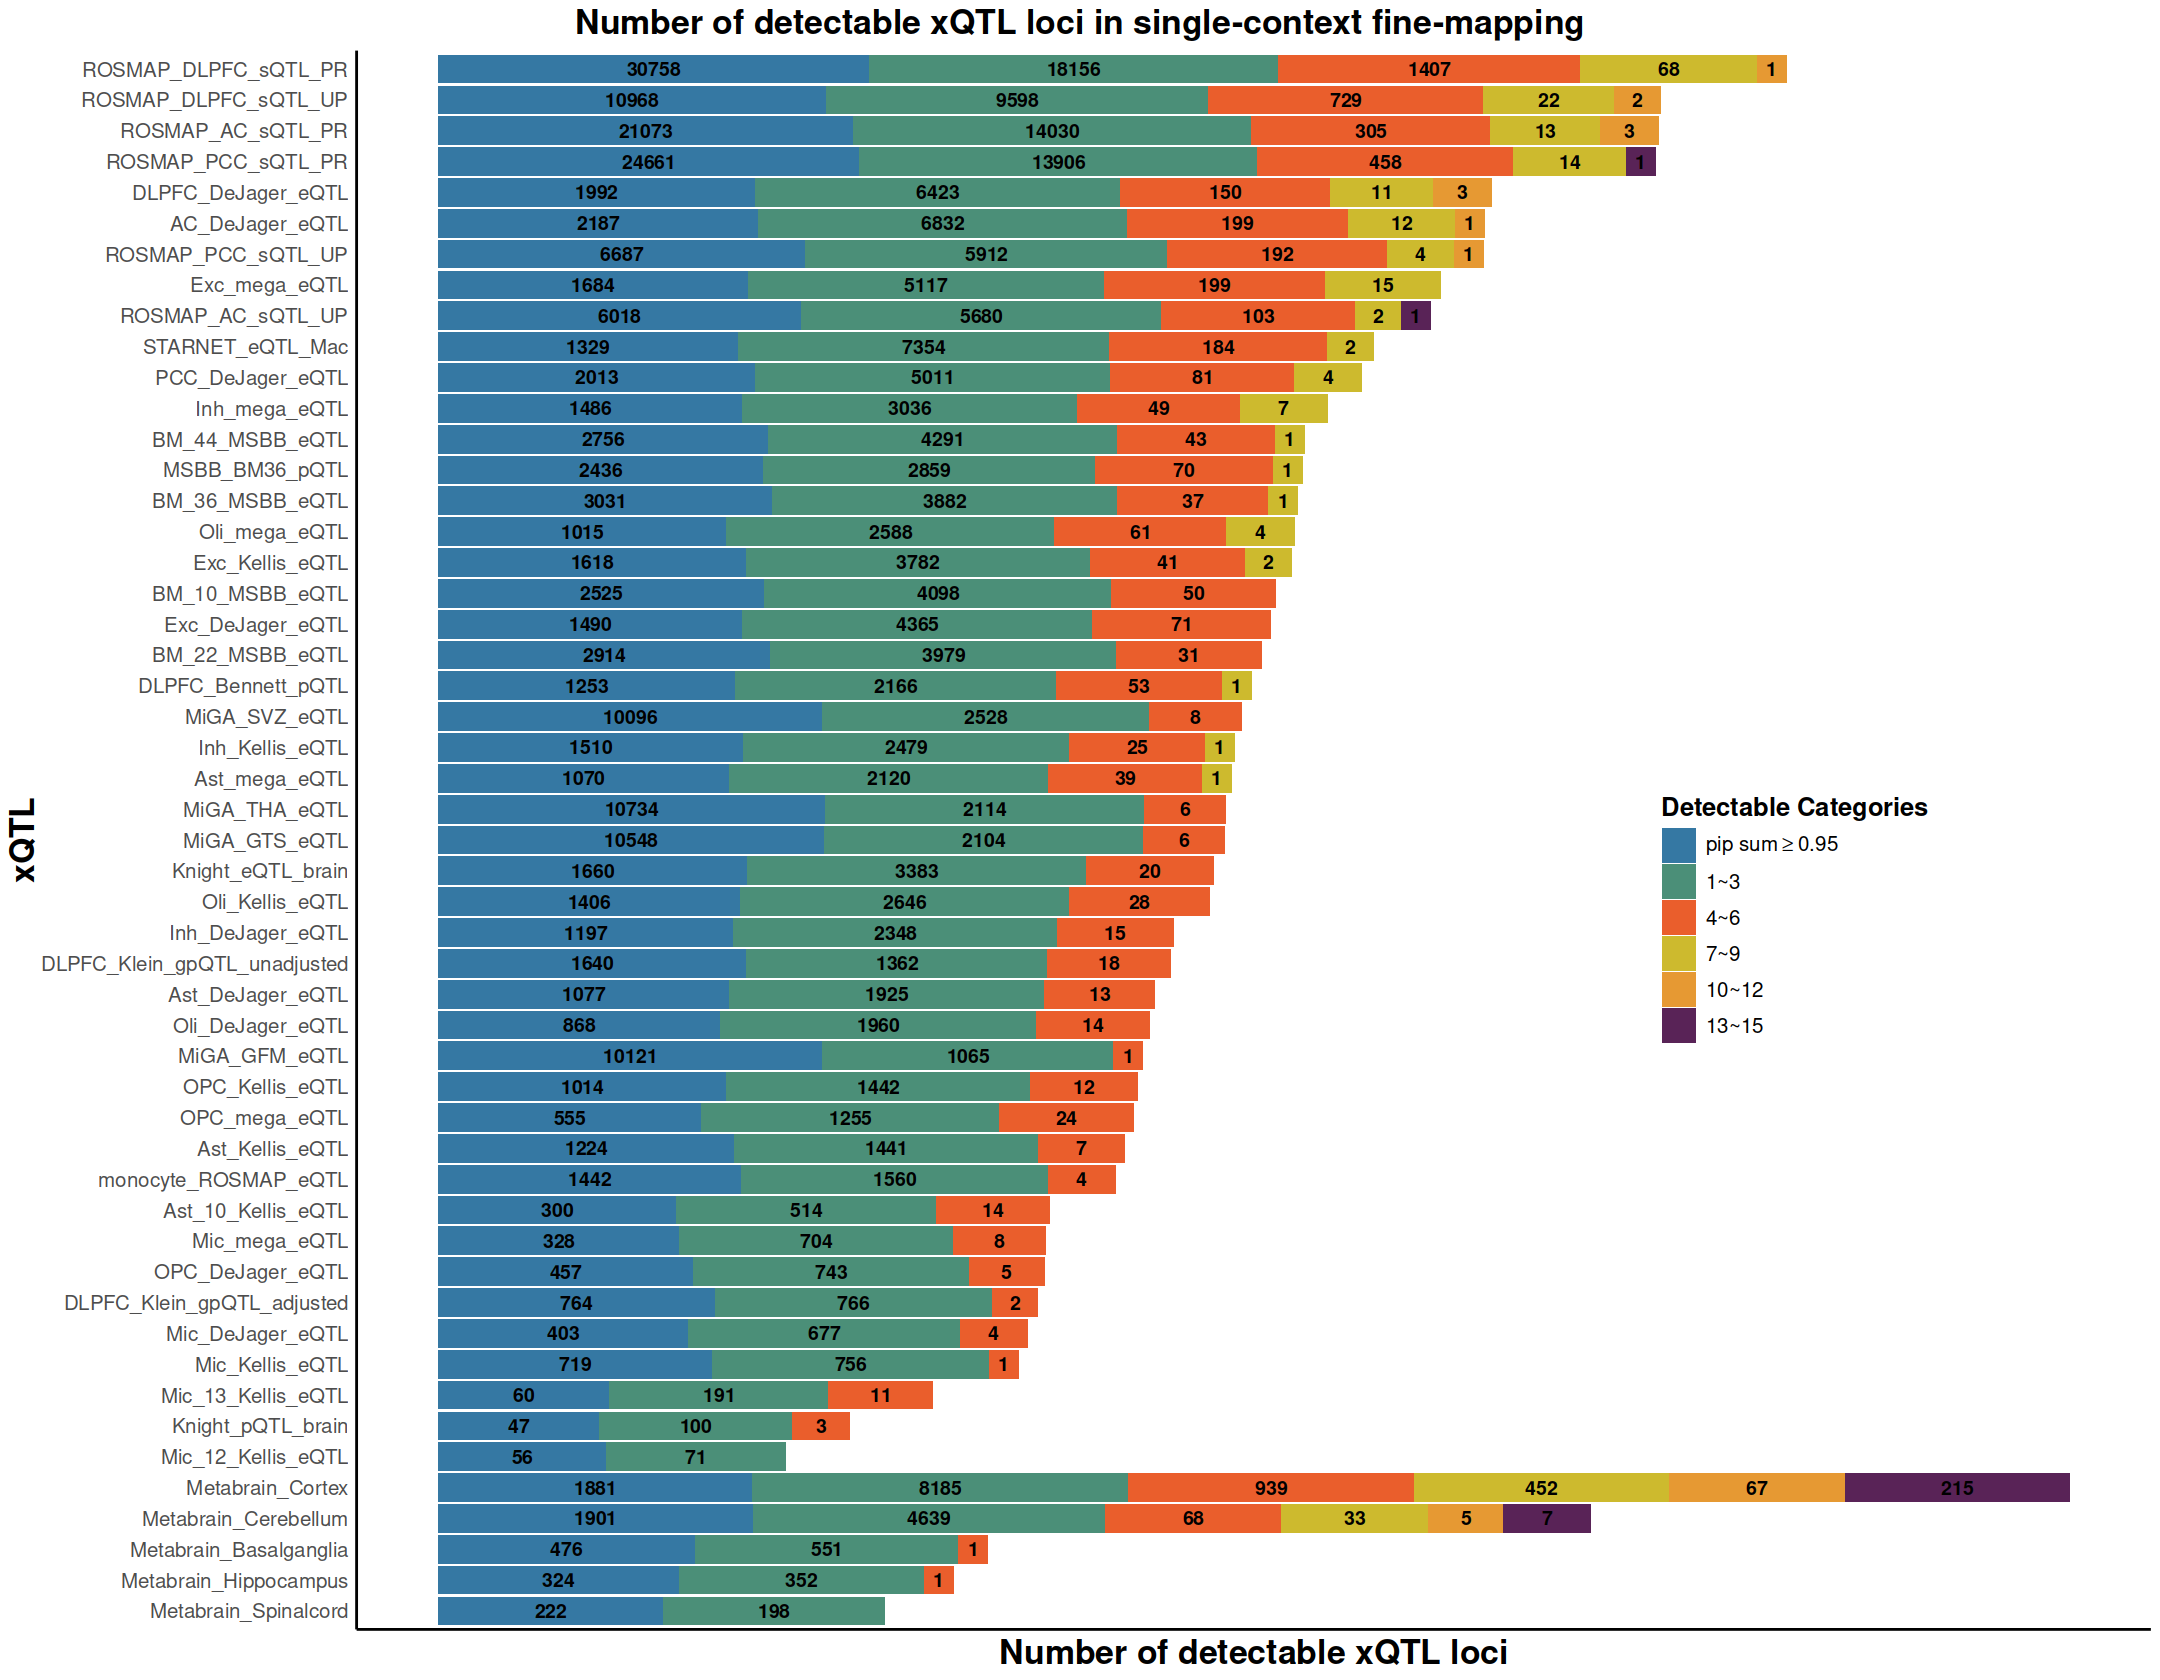

In [4]:
options(repr.plot.width = 18, repr.plot.height = 14)
p1

## mappable xQTL loci in single-context fine-mapping

In [6]:
single_context_mappable_events_summary <- readRDS("/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_1b_ii_2.rds") #FIXME
# First: calculate total counts per resource
total_counts <- single_context_mappable_events_summary %>%
  group_by(resource) %>%
  summarise(total_log_count = sum(log_gene_count), .groups = "drop")

# Identify metabrain contexts
metabrain_contexts <- grep("Metabrain", total_counts$resource, value = TRUE)

# Reorder factor levels: non-metabrain (descending), then metabrain (descending)
non_meta <- total_counts %>%
  filter(!resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

meta <- total_counts %>%
  filter(resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

ordered_resources <- factor(c(non_meta, meta), levels = c(non_meta, meta))

# Apply the order to your main data
single_context_mappable_events_summary$resource <- factor(single_context_mappable_events_summary$resource, levels = rev(levels(ordered_resources)))
#pdf("single_context_stacked_plot_mappable.pdf", width =10, height = 10)
# Create stacked bar plot
p2<- ggplot(single_context_mappable_events_summary, aes(x = resource, y = log_gene_count, fill = n_mappable_category)) +
  geom_bar(stat = "identity", position = "stack") +  # Stacked bars
 geom_text(aes(label = gene_count), position = position_stack(vjust = 0.5), color = "black", size = 4, fontface = "bold") +
  scale_fill_manual(values = color_palette, 
                    name = "Mappable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95),"1~3", "4~6", "7~9", "10~12","13~15")),guide = guide_legend(reverse = TRUE)) + 
  labs(title = "Number of mappable xQTL loci in single-context fine-mapping",
       x = "xQTL",
       y = "Number of mappable xQTL loci") +
  coord_flip() +
  theme_minimal() +
  theme(plot.title  = element_text(size = 20, face = "bold", hjust = 0.5),
       # aspect.ratio = 1/3,
    plot.title.position = "plot",
    axis.text.x = element_blank(),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 15, face = "bold"),
    legend.position = c(0.8, 0.45),
    #plot.margin = margin(10, 10, 10, 80),
    panel.grid   = element_blank(),        # removes both x and y grid lines
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background  = element_rect(fill = "white", colour = NA),
    axis.line = element_line(color = "black", size = 0.6),
      legend.key.size = unit(1.5, "lines"),
      legend.key.height = unit(1.5, "lines"),
  legend.key.width  = unit(1.5, "lines")
)
#dev.off()

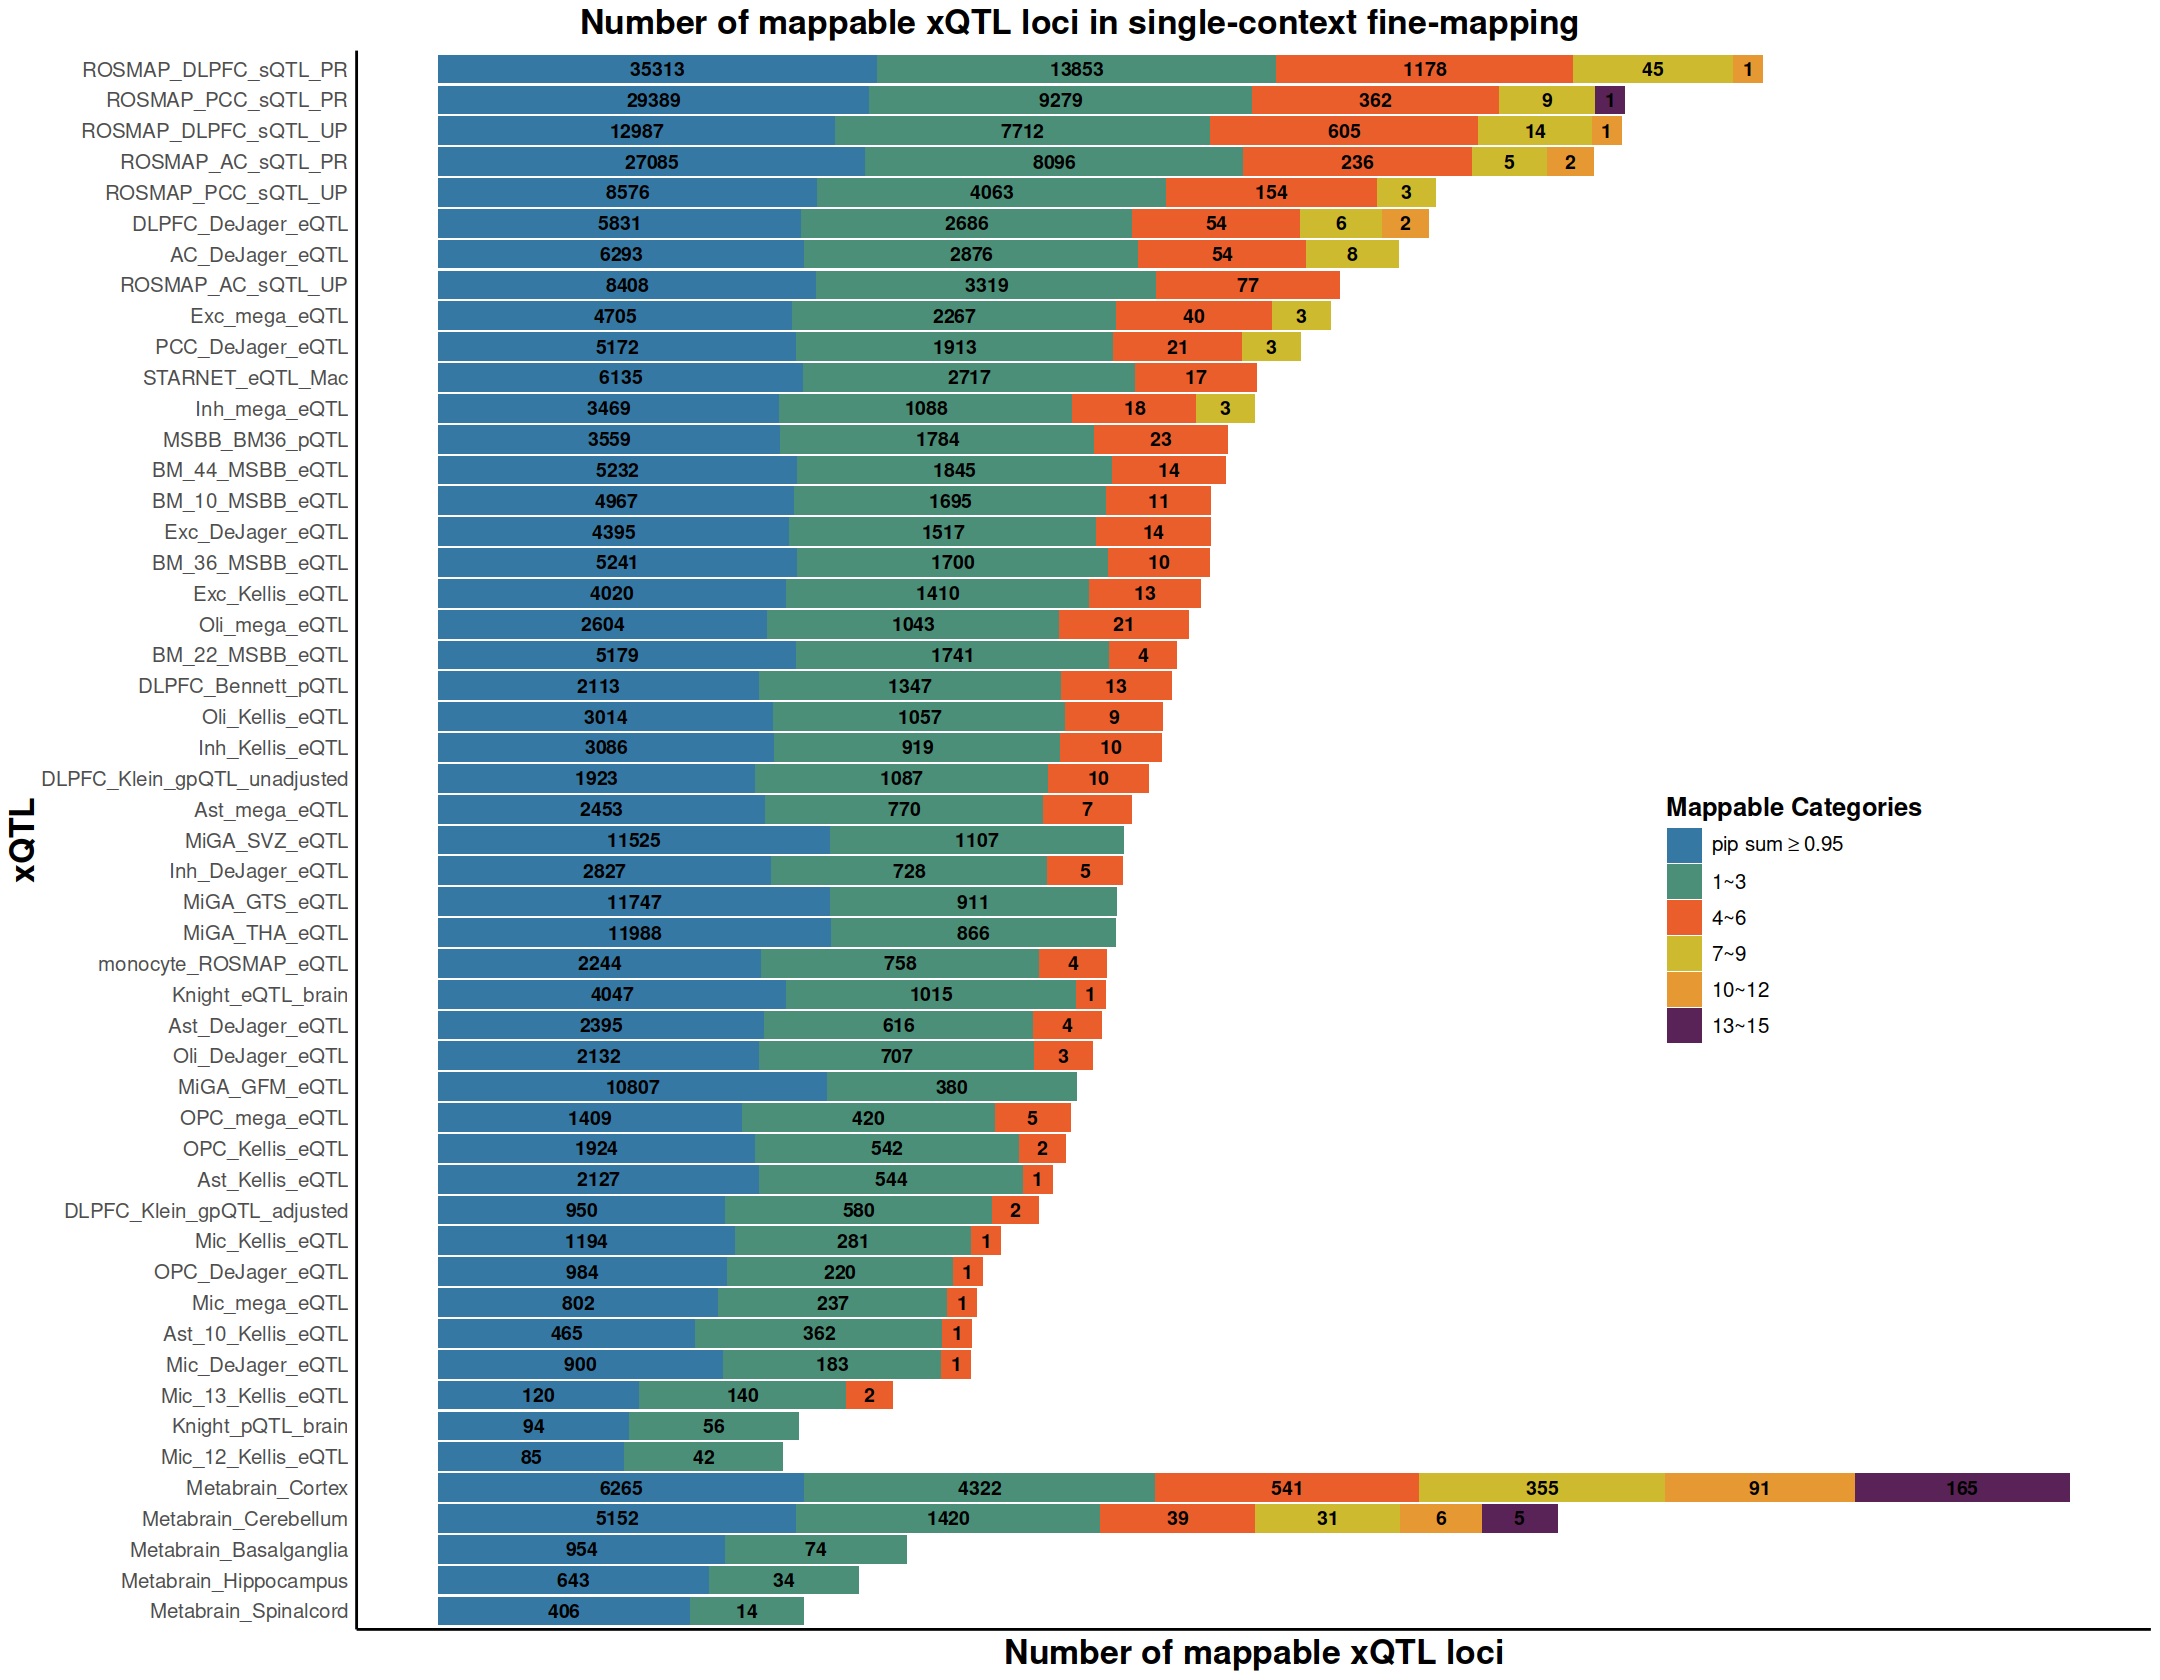

In [7]:
options(repr.plot.width = 18, repr.plot.height = 14)
p2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_text()`).”



✓ Figure generation complete.


Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_text()`).”


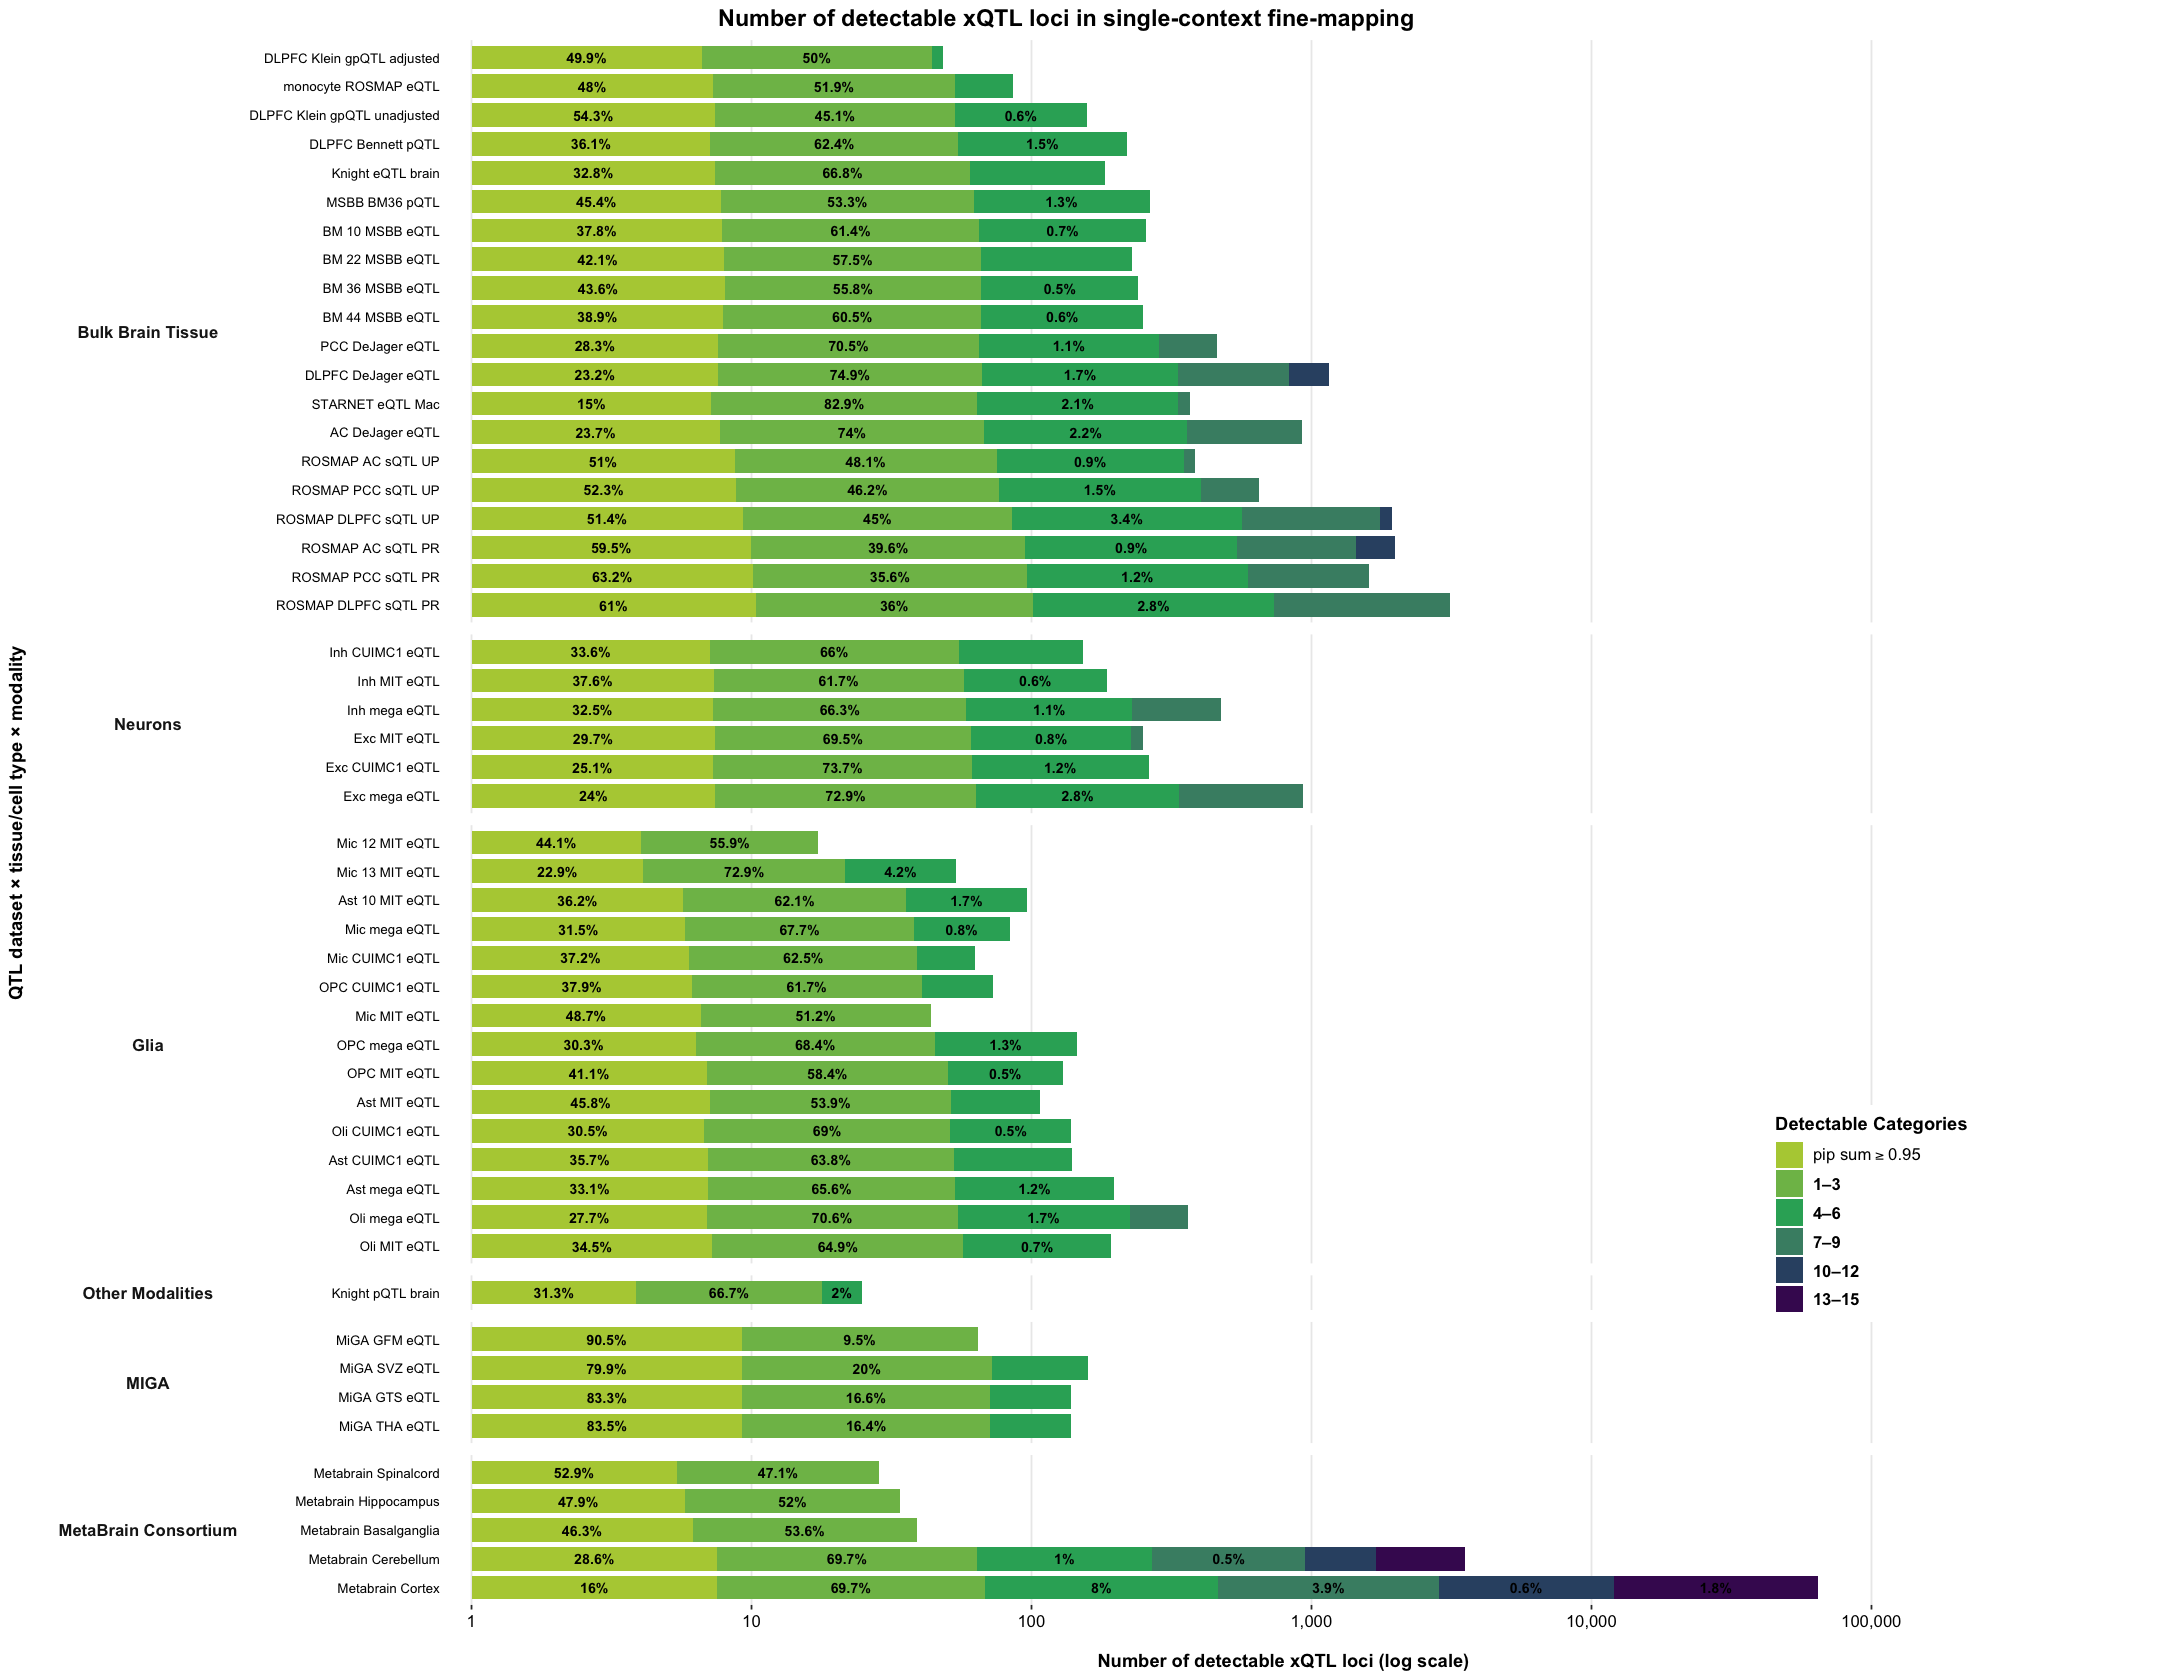


✓ Figure generation complete.


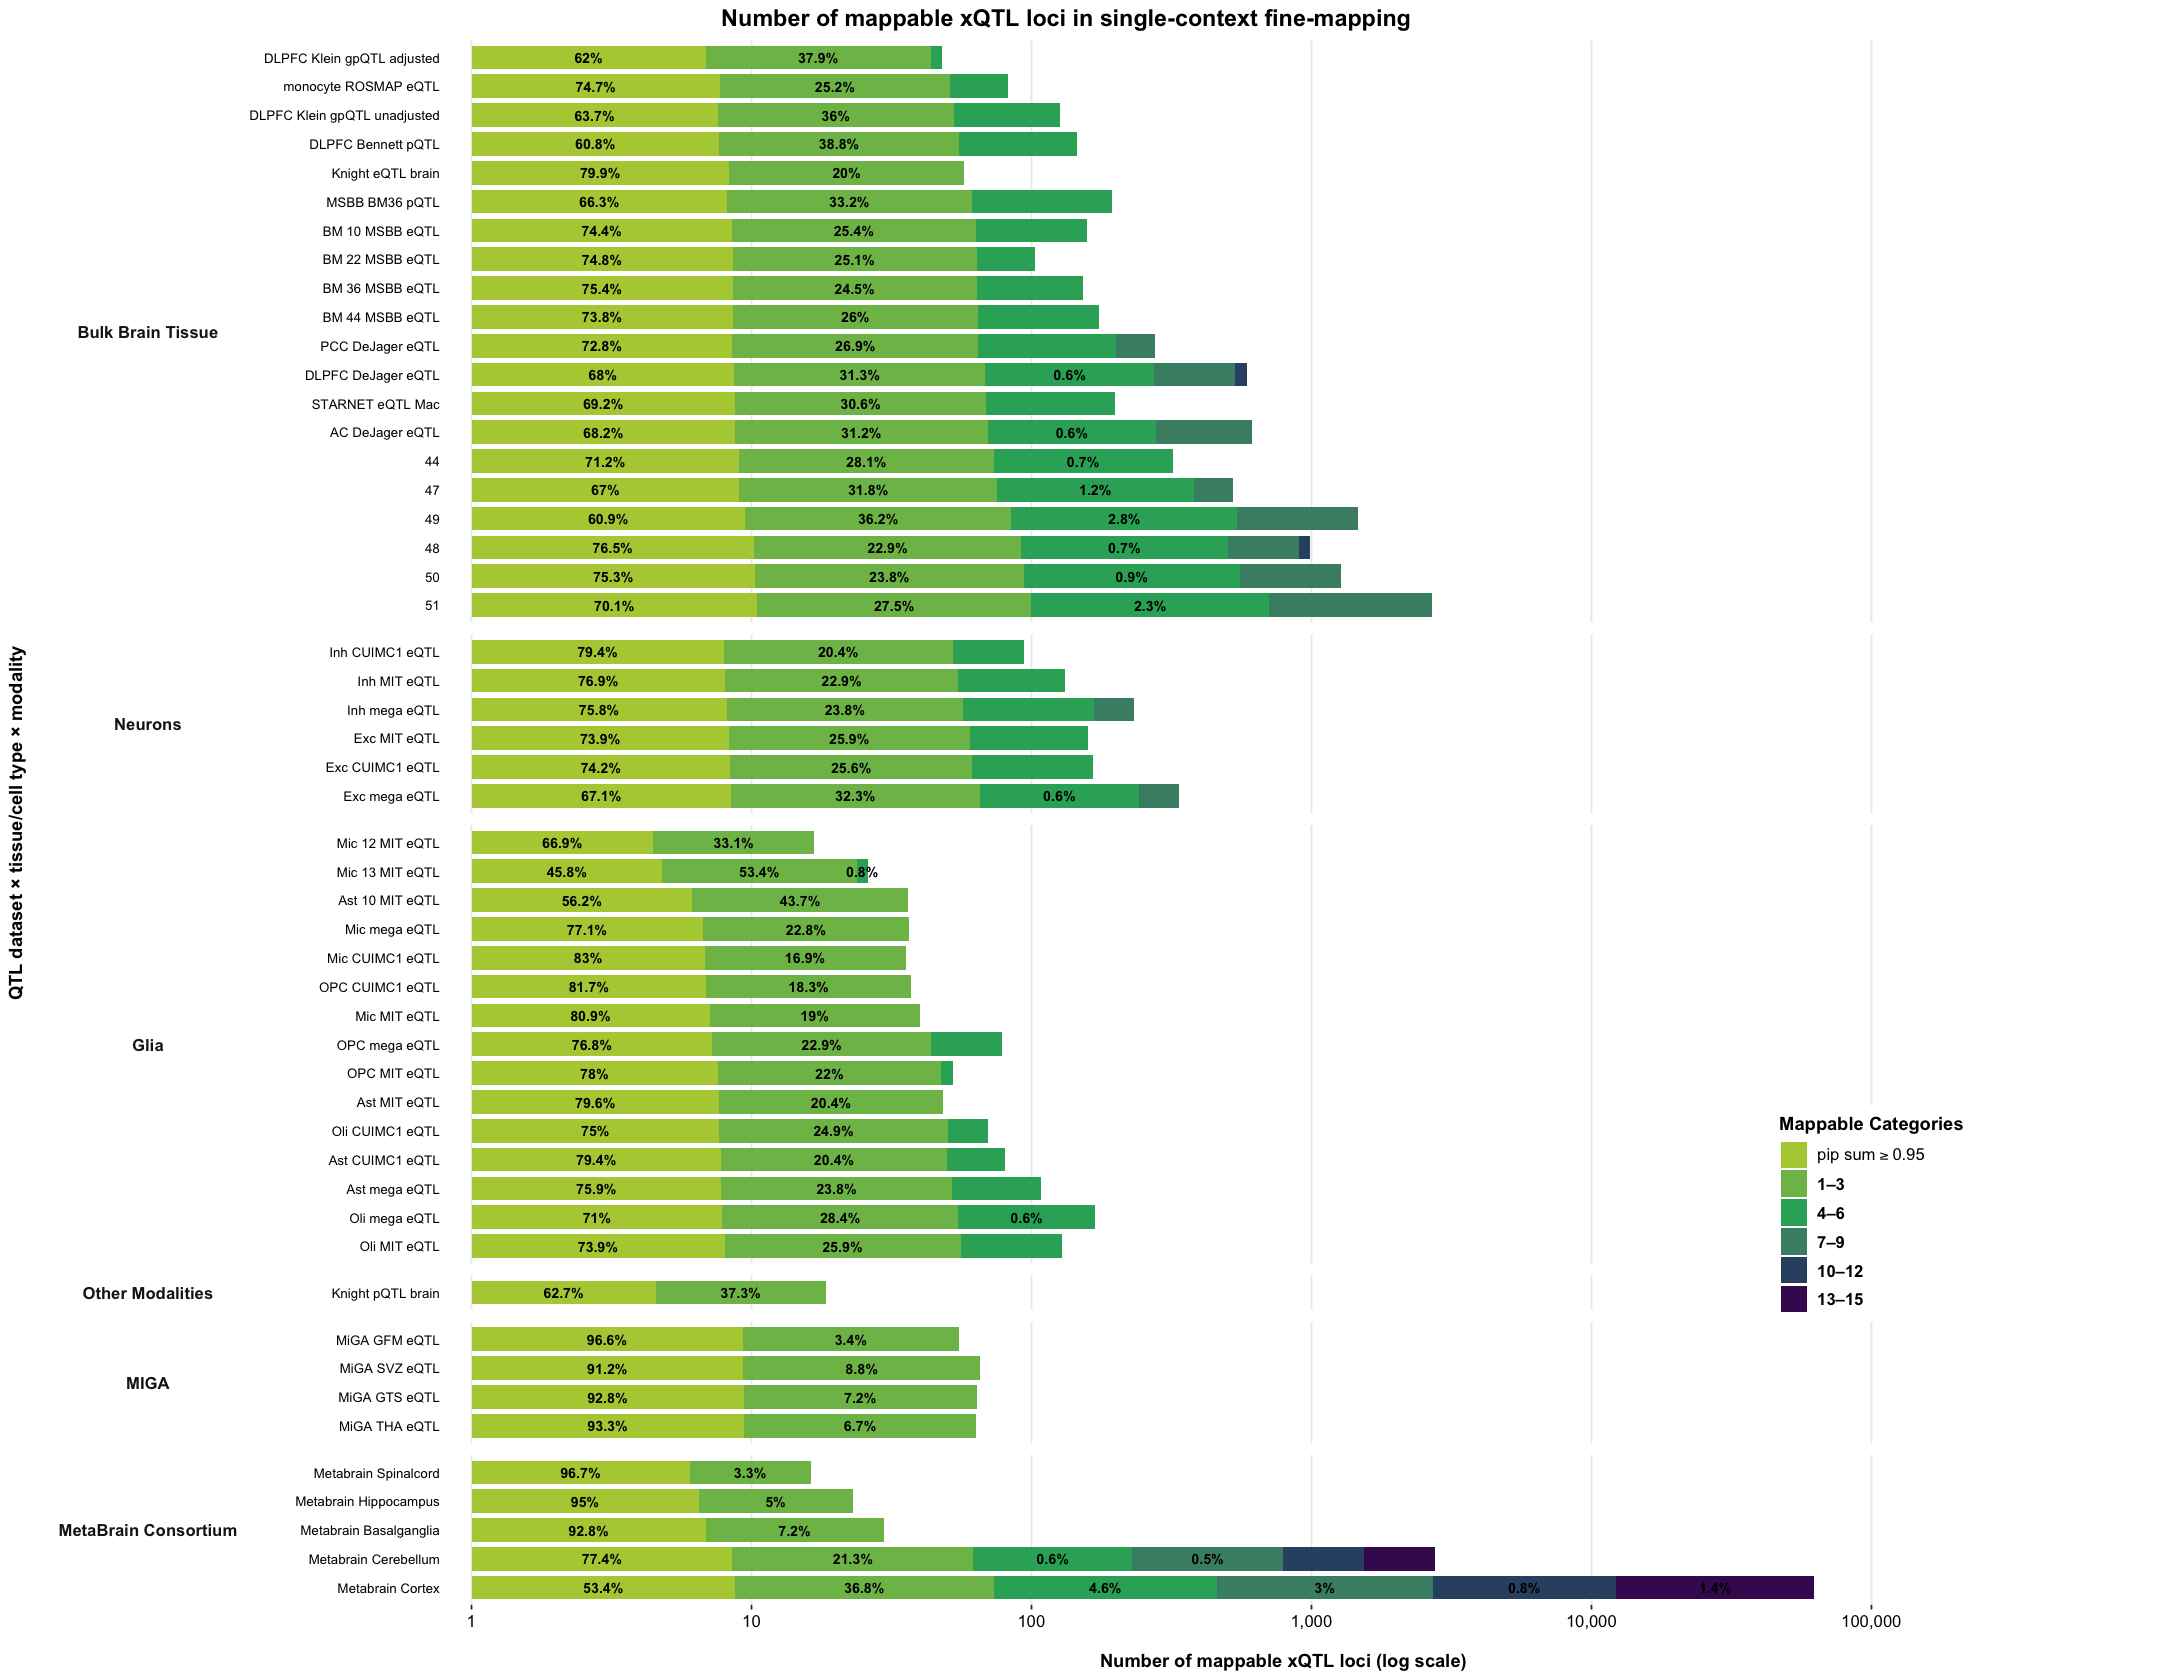

In [1]:
#Hillary edit
# Load required libraries
library(ggplot2)
library(dplyr)

# Load data and renamed metadata
figure_1b_data <- readRDS("/Users/shaoyuekun/Desktop/Dr.Wang/Figure_1b_num_xQTL_loci_single_context_2.rds")
contexts_metadata <- read.csv("/Users/shaoyuekun/Desktop/Dr.Wang/metadata/contexts_metadata_updated.csv", 
                              stringsAsFactors = FALSE)


# Preserve the original factor level order
original_order <- levels(figure_1b_data$detectable_data$resource)
figure_1b_data$detectable_data$resource <- as.character(figure_1b_data$detectable_data$resource)

# Create mapping function to match data with metadata
apply_metadata_mapping <- function(resource_names, contexts_metadata) {
  result <- character(length(resource_names))
  
  for(i in seq_along(resource_names)) {
    name <- resource_names[i]
    
    cell_types <- c("OPC", "Mic", "Inh", "Ast", "Oli", "Exc")
    contains_cell <- any(sapply(cell_types, function(cell) grepl(cell, name)))
    
    if(contains_cell) {
      metadata_key <- name
      metadata_key <- gsub("Kellis", "MIT", metadata_key)      
      metadata_key <- gsub("DeJager", "CUIMC1", metadata_key)  
      
      match_row <- contexts_metadata[contexts_metadata$context == metadata_key, ]
      
      if(nrow(match_row) > 0) {
        result[i] <- match_row$context[1]
      } else {
        result[i] <- name
      }
    } else {
      match_row <- contexts_metadata[contexts_metadata$context == name, ]
      
      if(nrow(match_row) > 0) {
        result[i] <- match_row$context[1]
      } else {
        result[i] <- name
      }
    }
  }
  
  return(result)
}

# Apply mapping to the data
figure_1b_data$detectable_data$mapped_resource <- apply_metadata_mapping(
  figure_1b_data$detectable_data$resource, 
  contexts_metadata
)

figure_1b_data$detectable_data$mapped_resource <- gsub("_", " ", 
                                                       figure_1b_data$detectable_data$mapped_resource)

# Calculate percentages and prepare total counts
figure_1b_data$detectable_data <- figure_1b_data$detectable_data %>%
  group_by(resource) %>%
  mutate(
    total_count = sum(gene_count),  # Sum actual counts for display
    percentage = round((gene_count / total_count) * 100, 1)
  ) %>%
  ungroup()

# Add tissue grouping for faceting (similar to the reference figure)
figure_1b_data$detectable_data <- figure_1b_data$detectable_data %>%
  mutate(
    tissue_group = case_when(
      grepl("STARNET|ROSMAP|PCC|DLPFC|MSBB|Knight.*eQTL.*brain|AC.*DeJager|BM.*MSBB|PCC.*DeJager", resource) ~ "Bulk Brain Tissue",
      grepl("Inh|Exc", resource) ~ "Neurons",
      grepl("Knight.*pQTL|DLPFC.*Klein", resource) ~ "Other Modalities",
      grepl("MIGA|MiGA", resource) ~ "MIGA",
      grepl("Metabrain", resource) ~ "MetaBrain Consortium",
      TRUE ~ "Glia"
    )
  )

# Create ordering within each tissue group (descending by total count)
figure_1b_data$detectable_data <- figure_1b_data$detectable_data %>%
  group_by(tissue_group) %>%
  arrange(desc(total_count), .by_group = TRUE) %>%
  mutate(rank_in_group = dense_rank(desc(total_count))) %>%
  ungroup()

# Define color palette
figure_1b_data$color_palette_new <- c("#451460","#335172","#478d73","#2eac66", "#7ebc57", "#b3cd41")

# Set plot options and theme
options(repr.plot.width = 18, repr.plot.height = 14)
theme_set(theme_minimal(base_family = "Roboto"))

# Create the main plot with faceted structure
# Define the order of tissue groups for faceting
tissue_group_order <- c("Bulk Brain Tissue", "Neurons", "Glia", "Other Modalities", 
                        "MIGA", "MetaBrain Consortium")

figure_1b_data$detectable_data <- figure_1b_data$detectable_data %>%
  mutate(tissue_group = factor(tissue_group, levels = tissue_group_order))

p1 <- ggplot(figure_1b_data$detectable_data,
             aes(x = pmax(log_gene_count, 0.001),  # Avoid log issues
                 y = reorder(mapped_resource, rank_in_group),
                 fill = n_detectable_category)) +
  
  geom_bar(stat = "identity", position = "stack", width = 0.82) +
  
  # Add percentage labels on bars (only show if >= 0.5%)
  geom_text(aes(label = ifelse(gene_count > 0 & percentage >= 0.5, 
                               paste0(percentage, "%"), "")),
            position = position_stack(vjust = 0.5),
            color = "black", size = 3, fontface = "bold", lineheight = 0.9) +
  
  # Add total count labels at the end of bars
  # geom_text(data = function(x) x %>% 
  #             group_by(resource, tissue_group) %>%
  #             summarise(
  #               total_count = first(total_count),
  #               mapped_resource = first(mapped_resource),
  #               rank_in_group = first(rank_in_group),
  #               .groups = 'drop'),
  #           aes(x = total_count,  # Use actual count, not log
  #               y = reorder(mapped_resource, rank_in_group),
  #               label = total_count),
  #           hjust = 5, vjust = 0.5,
  #           color = "black", size = 3, fontface = "bold", inherit.aes = FALSE) +  
  # Color scale for detectable categories
  scale_fill_manual(values = figure_1b_data$color_palette_new, 
                    name = "Detectable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95), 
                                   "1–3", "4–6", "7–9", "10–12", "13–15")),
                    guide = guide_legend(reverse = TRUE)) + 
  
  # Facet by tissue group with free y-axis scales
  facet_grid(tissue_group ~ ., scales = "free_y", space = "free_y", switch = "y") +
  
  # Axis labels and title
  labs(
    title = "Number of detectable xQTL loci in single-context fine-mapping",
    x = "Number of detectable xQTL loci (log scale)",   
    y = "QTL dataset × tissue/cell type × modality"
  ) +
  
  # X-axis scale with better spacing and more breaks
  scale_x_continuous(
    trans  = "log10",
    breaks = 10^(0:5),
    minor_breaks = as.numeric(outer(1:9, 10^(0:5))),
    labels = c("1","10","100","1,000","10,000","100,000"),
    expand = expansion(mult = c(0.02, 0.18)),
    limits = c(1, 1e5)
  ) +
  
  theme_bw(base_size = 11) +
  theme(
    strip.placement = "outside",
    strip.background = element_blank(),
    strip.text.y.left = element_text(angle = 0, face = "bold", size = 10),
    
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
    plot.title.position = "plot",
    
    axis.text.x = element_text(size = 10, color = "black", angle = 0, vjust = 0.5),
    axis.text.y = element_text(size = 8, color = "black"),
    axis.title.x = element_text(size = 11, face = "bold", margin = margin(t = 15)),
    axis.title.y = element_text(size = 11, face = "bold", margin = margin(r = 15)),
    axis.ticks.y = element_blank(),
    
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    
    panel.border = element_blank(),
    panel.spacing = unit(0.5, "lines"),
    
    legend.text = element_text(size = 10, face = "bold"),
    legend.title = element_text(size = 11, face = "bold"),
    legend.position = c(0.85, 0.25),
    legend.key.size = unit(1.2, "lines"),
    
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background = element_rect(fill = "white", colour = NA),
    
    plot.margin = margin(5.5, 22, 5.5, 5.5)
  ) +
  
  coord_cartesian(clip = "off")

print(p1)

# ------------------------------------------------------------------------------
# Optional: Save the plot
# ------------------------------------------------------------------------------
# Uncomment to save the plot
# ggsave("figure_1b_detectable_xQTL_loci.png", p1, 
#        width = 18, height = 14, dpi = 300, bg = "white")
# ggsave("figure_1b_detectable_xQTL_loci.pdf", p1, 
#        width = 18, height = 14, bg = "white")

cat("\n✓ Figure generation complete.\n")





# ------------------------------------------------------------------------------
# Apply mapping to the data
# ------------------------------------------------------------------------------
figure_1b_data$mappable_data$mapped_resource <- apply_metadata_mapping(
  figure_1b_data$mappable_data$resource, 
  contexts_metadata
)

# Replace underscores with spaces for display
figure_1b_data$mappable_data$mapped_resource <- gsub("_", " ", 
                                                     figure_1b_data$mappable_data$mapped_resource)

# ------------------------------------------------------------------------------
# Calculate percentages and prepare total counts
# CRITICAL: Use gene_count (actual counts) for totals, not log_gene_count
# ------------------------------------------------------------------------------
figure_1b_data$mappable_data <- figure_1b_data$mappable_data %>%
  group_by(resource) %>%
  mutate(
    total_count = sum(gene_count),  # Sum actual counts for display
    percentage = round((gene_count / total_count) * 100, 1)
  ) %>%
  ungroup()

# Add tissue grouping for faceting (similar to the reference figure)
figure_1b_data$mappable_data <- figure_1b_data$mappable_data %>%
  mutate(
    tissue_group = case_when(
      grepl("STARNET|ROSMAP|PCC|DLPFC|MSBB|Knight.*eQTL.*brain|AC.*DeJager|BM.*MSBB|PCC.*DeJager", resource) ~ "Bulk Brain Tissue",
      grepl("Inh|Exc", resource) ~ "Neurons",
      grepl("Knight.*pQTL|DLPFC.*Klein", resource) ~ "Other Modalities",
      grepl("MIGA|MiGA", resource) ~ "MIGA",
      grepl("Metabrain", resource) ~ "MetaBrain Consortium",
      TRUE ~ "Glia"
    )
  )

# Create ordering within each tissue group (descending by total count)
figure_1b_data$mappable_data <- figure_1b_data$mappable_data %>%
  group_by(tissue_group) %>%
  arrange(desc(total_count), .by_group = TRUE) %>%
  mutate(rank_in_group = dense_rank(desc(total_count))) %>%
  ungroup()

# ------------------------------------------------------------------------------
# Define color palette
# ------------------------------------------------------------------------------
figure_1b_data$color_palette_new <- c("#451460","#335172","#478d73","#2eac66", "#7ebc57", "#b3cd41")

# ------------------------------------------------------------------------------
# Set plot options and theme
# ------------------------------------------------------------------------------
options(repr.plot.width = 18, repr.plot.height = 14)
theme_set(theme_minimal(base_family = "Roboto"))

# ------------------------------------------------------------------------------
# Create the main plot with faceted structure
# ------------------------------------------------------------------------------
# Define the order of tissue groups for faceting
tissue_group_order <- c("Bulk Brain Tissue", "Neurons", "Glia", "Other Modalities", 
                        "MIGA", "MetaBrain Consortium")

figure_1b_data$mappable_data <- figure_1b_data$mappable_data %>%
  mutate(tissue_group = factor(tissue_group, levels = tissue_group_order))

p2 <- ggplot(figure_1b_data$mappable_data,
             aes(x = pmax(log_gene_count, 0.001),  # Avoid log issues
                 y = reorder(mapped_resource, rank_in_group),
                 fill = n_mappable_category)) +
  
  # Stacked bar chart
  geom_bar(stat = "identity", position = "stack", width = 0.82) +
  
  # Add percentage labels on bars (only show if >= 0.5%)
  geom_text(aes(label = ifelse(gene_count > 0 & percentage >= 0.5, 
                               paste0(percentage, "%"), "")),
            position = position_stack(vjust = 0.5),
            color = "black", size = 3, fontface = "bold", lineheight = 0.9) +
  
  # Add total count labels at the end of bars
  # geom_text(data = function(x) x %>% 
  #             group_by(resource, tissue_group) %>%
  #             summarise(
  #               total_count = first(total_count),
  #               mapped_resource = first(mapped_resource),
  #               rank_in_group = first(rank_in_group),
  #               .groups = 'drop'),
  #           aes(x = total_count,  # Use actual count, not log
  #               y = reorder(mapped_resource, rank_in_group),
  #               label = total_count),
  #           hjust = 5, vjust = 0.5,
  #           color = "black", size = 3, fontface = "bold", inherit.aes = FALSE) +  
  # Color scale for mappable categories
  scale_fill_manual(values = figure_1b_data$color_palette_new, 
                    name = "Mappable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95), 
                                   "1–3", "4–6", "7–9", "10–12", "13–15")),
                    guide = guide_legend(reverse = TRUE)) + 
  
  # Facet by tissue group with free y-axis scales
  facet_grid(tissue_group ~ ., scales = "free_y", space = "free_y", switch = "y") +
  
  # Axis labels and title
  labs(
    title = "Number of mappable xQTL loci in single-context fine-mapping",
    x = "Number of mappable xQTL loci (log scale)",   
    y = "QTL dataset × tissue/cell type × modality"
  ) +
  
  # X-axis scale with better spacing and more breaks
  scale_x_continuous(
    trans  = "log10",
    breaks = 10^(0:5),
    minor_breaks = as.numeric(outer(1:9, 10^(0:5))),
    labels = c("1","10","100","1,000","10,000","100,000"),
    expand = expansion(mult = c(0.02, 0.18)),
    limits = c(1, 1e5)
  ) +
  
  # Theme customization matching reference figure
  theme_bw(base_size = 11) +
  theme(
    # Facet strips on the left like reference
    strip.placement = "outside",
    strip.background = element_blank(),
    strip.text.y.left = element_text(angle = 0, face = "bold", size = 10),
    
    # Title
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
    plot.title.position = "plot",
    
    # Axis styling
    axis.text.x = element_text(size = 10, color = "black", angle = 0, vjust = 0.5),
    axis.text.y = element_text(size = 8, color = "black"),
    axis.title.x = element_text(size = 11, face = "bold", margin = margin(t = 15)),
    axis.title.y = element_text(size = 11, face = "bold", margin = margin(r = 15)),
    axis.ticks.y = element_blank(),
    
    # Grid
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    
    # Remove panel borders
    panel.border = element_blank(),
    panel.spacing = unit(0.5, "lines"),
    
    # Legend
    legend.text = element_text(size = 10, face = "bold"),
    legend.title = element_text(size = 11, face = "bold"),
    legend.position = c(0.85, 0.25),
    legend.key.size = unit(1.2, "lines"),
    
    # Background
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background = element_rect(fill = "white", colour = NA),
    
    # Margins
    plot.margin = margin(5.5, 22, 5.5, 5.5)
  ) +
  
  # Allow text labels to extend beyond plot area
  coord_cartesian(clip = "off")

# Display the plot
print(p2)


cat("\n✓ Figure generation complete.\n")